# Problem number-1
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

# IMPORTING CSV FILE

In [3]:
fraud=pd.read_csv("Fraud_check.csv.")

# EDA

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [7]:
fraud.shape

(600, 6)

In [8]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fraud.duplicated().sum()

0

# Feature Engineering

 Adding A New Column "Fraud_Check"

In [10]:
fraud['Fraud_Check'] = pd.cut(fraud['Taxable.Income'], bins=[0, 30000, 1000000], labels=['Risk', 'No Risk'])

In [11]:
np.unique(fraud["Fraud_Check"])

array(['No Risk', 'Risk'], dtype=object)

In [12]:
fraud["Fraud_Check"].value_counts()

No Risk    476
Risk       124
Name: Fraud_Check, dtype: int64

# Using Label Encoding


In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['Fraud_Check']= label_encoder.fit_transform(fraud['Fraud_Check'])

In [15]:
fraud_mod=fraud

In [16]:
fraud_mod.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [17]:
fraud_mod["Fraud_Check"].value_counts()


0    476
1    124
Name: Fraud_Check, dtype: int64

In [18]:
fraud_mod["Urban"].value_counts()


1    302
0    298
Name: Urban, dtype: int64

In [19]:
fraud_mod["Marital.Status"].value_counts()


2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [20]:
fraud_mod["Undergrad"].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

# Splitting Data

In [21]:
X=fraud_mod.iloc[:,0:-1]
y=fraud_mod.iloc[:,-1]

In [22]:
X.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [23]:
X.shape

(600, 6)

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fraud_Check, dtype: int32

In [25]:
y.shape

(600,)

# Training - Testing Data

In [26]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train.shape

(402, 6)

In [28]:
X_test.shape

(198, 6)

In [29]:
y_train.shape

(402,)

In [30]:
y_test.shape

(198,)

# Building Decision Tree Classifier using "gini" Criteria

In [31]:
first_model=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)

In [32]:
first_model

DecisionTreeClassifier(max_depth=10)

In [33]:
first_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [34]:
pred=first_model.predict(X_test)

In [35]:
pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

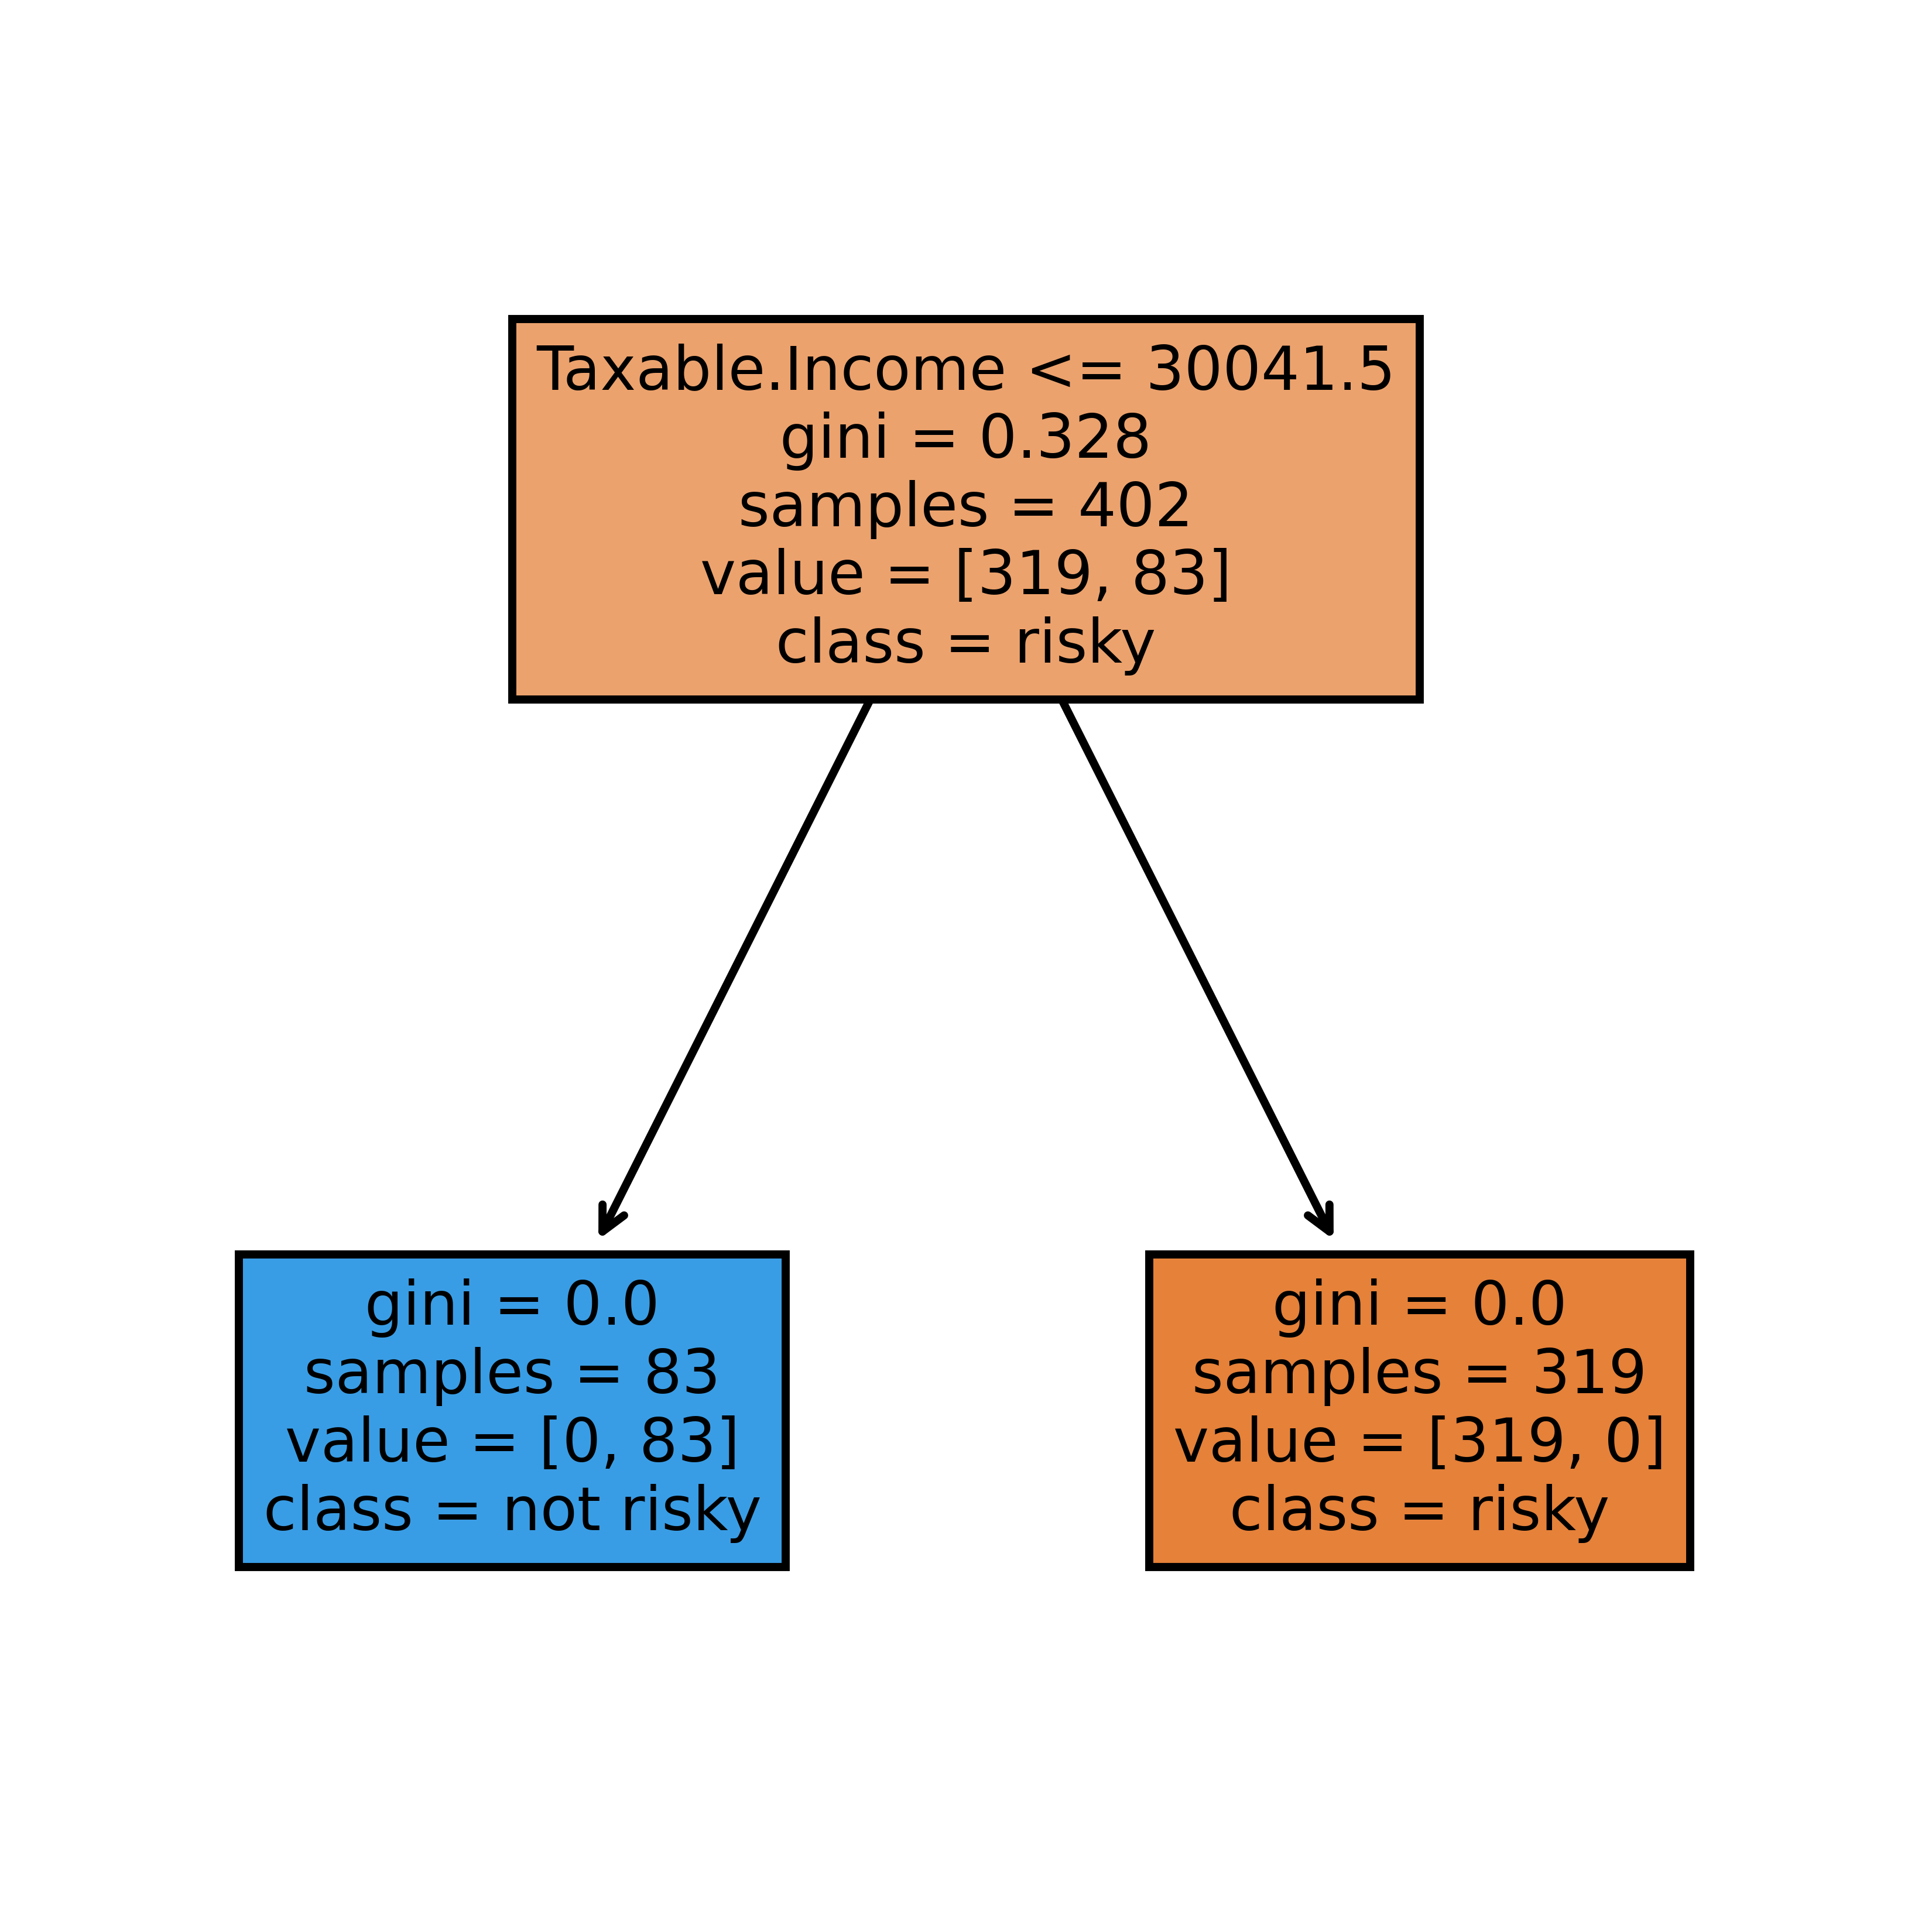

In [36]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky', 'not risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(first_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [37]:
accuracy_score(pred,y_test)

1.0

# Inference
A test set's genuine labels and all projected labels line up exactly, as indicated by an accuracy score of 1.0. This shows that the model correctly classified each instance and made no errors in its predictions.

A flawless accuracy score should, however, be treated with caution because it can be a sign of data leakage, overfitting, or an error in the evaluation process. It is advised to thoroughly validate the model and conduct more research to make sure the accuracy is real and not the consequence of any underlying problems.


In [38]:
from sklearn.metrics import classification_report


In [39]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        41

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



# inference
Precision: For both class 0 and class 1, the precision is 1.00, indicating that all instances predicted as class 0 and class 1 were actually in those respective classes. A precision of 1.00 implies no false positives.

Recall: For both class 0 and class 1, the recall is 1.00, suggesting that all instances belonging to class 0 and class 1 were correctly identified. A recall of 1.00 implies no false negatives.

F1-score: The F1-score for both class 0 and class 1 is 1.00, representing the harmonic mean of precision and recall for each class. A perfect F1-score indicates an accurate balance between precision and recall.

Support: For class 0, there are 157 instances, and for class 1, there are 41 instances.

Accuracy: The overall accuracy is 1.00, indicating that all instances in the test set were correctly predicted.

Macro average: The macro average precision, recall, and F1-score are all 1.00, suggesting an excellent average performance across all classes.

Weighted average: The weighted average precision, recall, and F1-score are all 1.00, indicating the average performance weighted by the support for each class.

In summary, the classification report indicates perfect performance for both classes, with precision, recall, F1-score, and accuracy all equal to 1.00. This implies that the model made no errors in its predictions and achieved 100% accuracy. However, as mentioned earlier, it's essential to validate the model and ensure that the perfect accuracy is not due to any underlying issues such as data leakage or overfitting.

In [40]:
print(confusion_matrix(y_test,pred))

[[157   0]
 [  0  41]]


# inference
The confusion matrix is a table that summarizes the performance of a classification model by counting the number of true positives, true negatives, false positives, and false negatives for each class.

Analyzing the confusion matrix :

Class 0: There are 157 instances correctly classified as class 0 (true negatives), indicating accurate predictions. There are no instances incorrectly classified as class 1 (false positives) for this class.

Class 1: There are 41 instances correctly classified as class 1 (true positives), suggesting accurate identification. There are no instances incorrectly classified as class 0 (false negatives) for this class.

The confusion matrix shows a perfect classification performance, with no misclassifications for either class. All instances in class 0 and class 1 were correctly predicted.

This indicates that the model achieved a perfect accuracy of 100%, as shown in the previous classification report. However, it is important to carefully analyze and validate the model to ensure that the perfect performance is not a result of any underlying issues such as data leakage or overfitting.

# Building Decision Tree Classifier using "entropy" Criteria

In [41]:
second_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2)

In [42]:
second_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
pred_second=second_model.predict(X_test)

In [44]:
pred_second

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

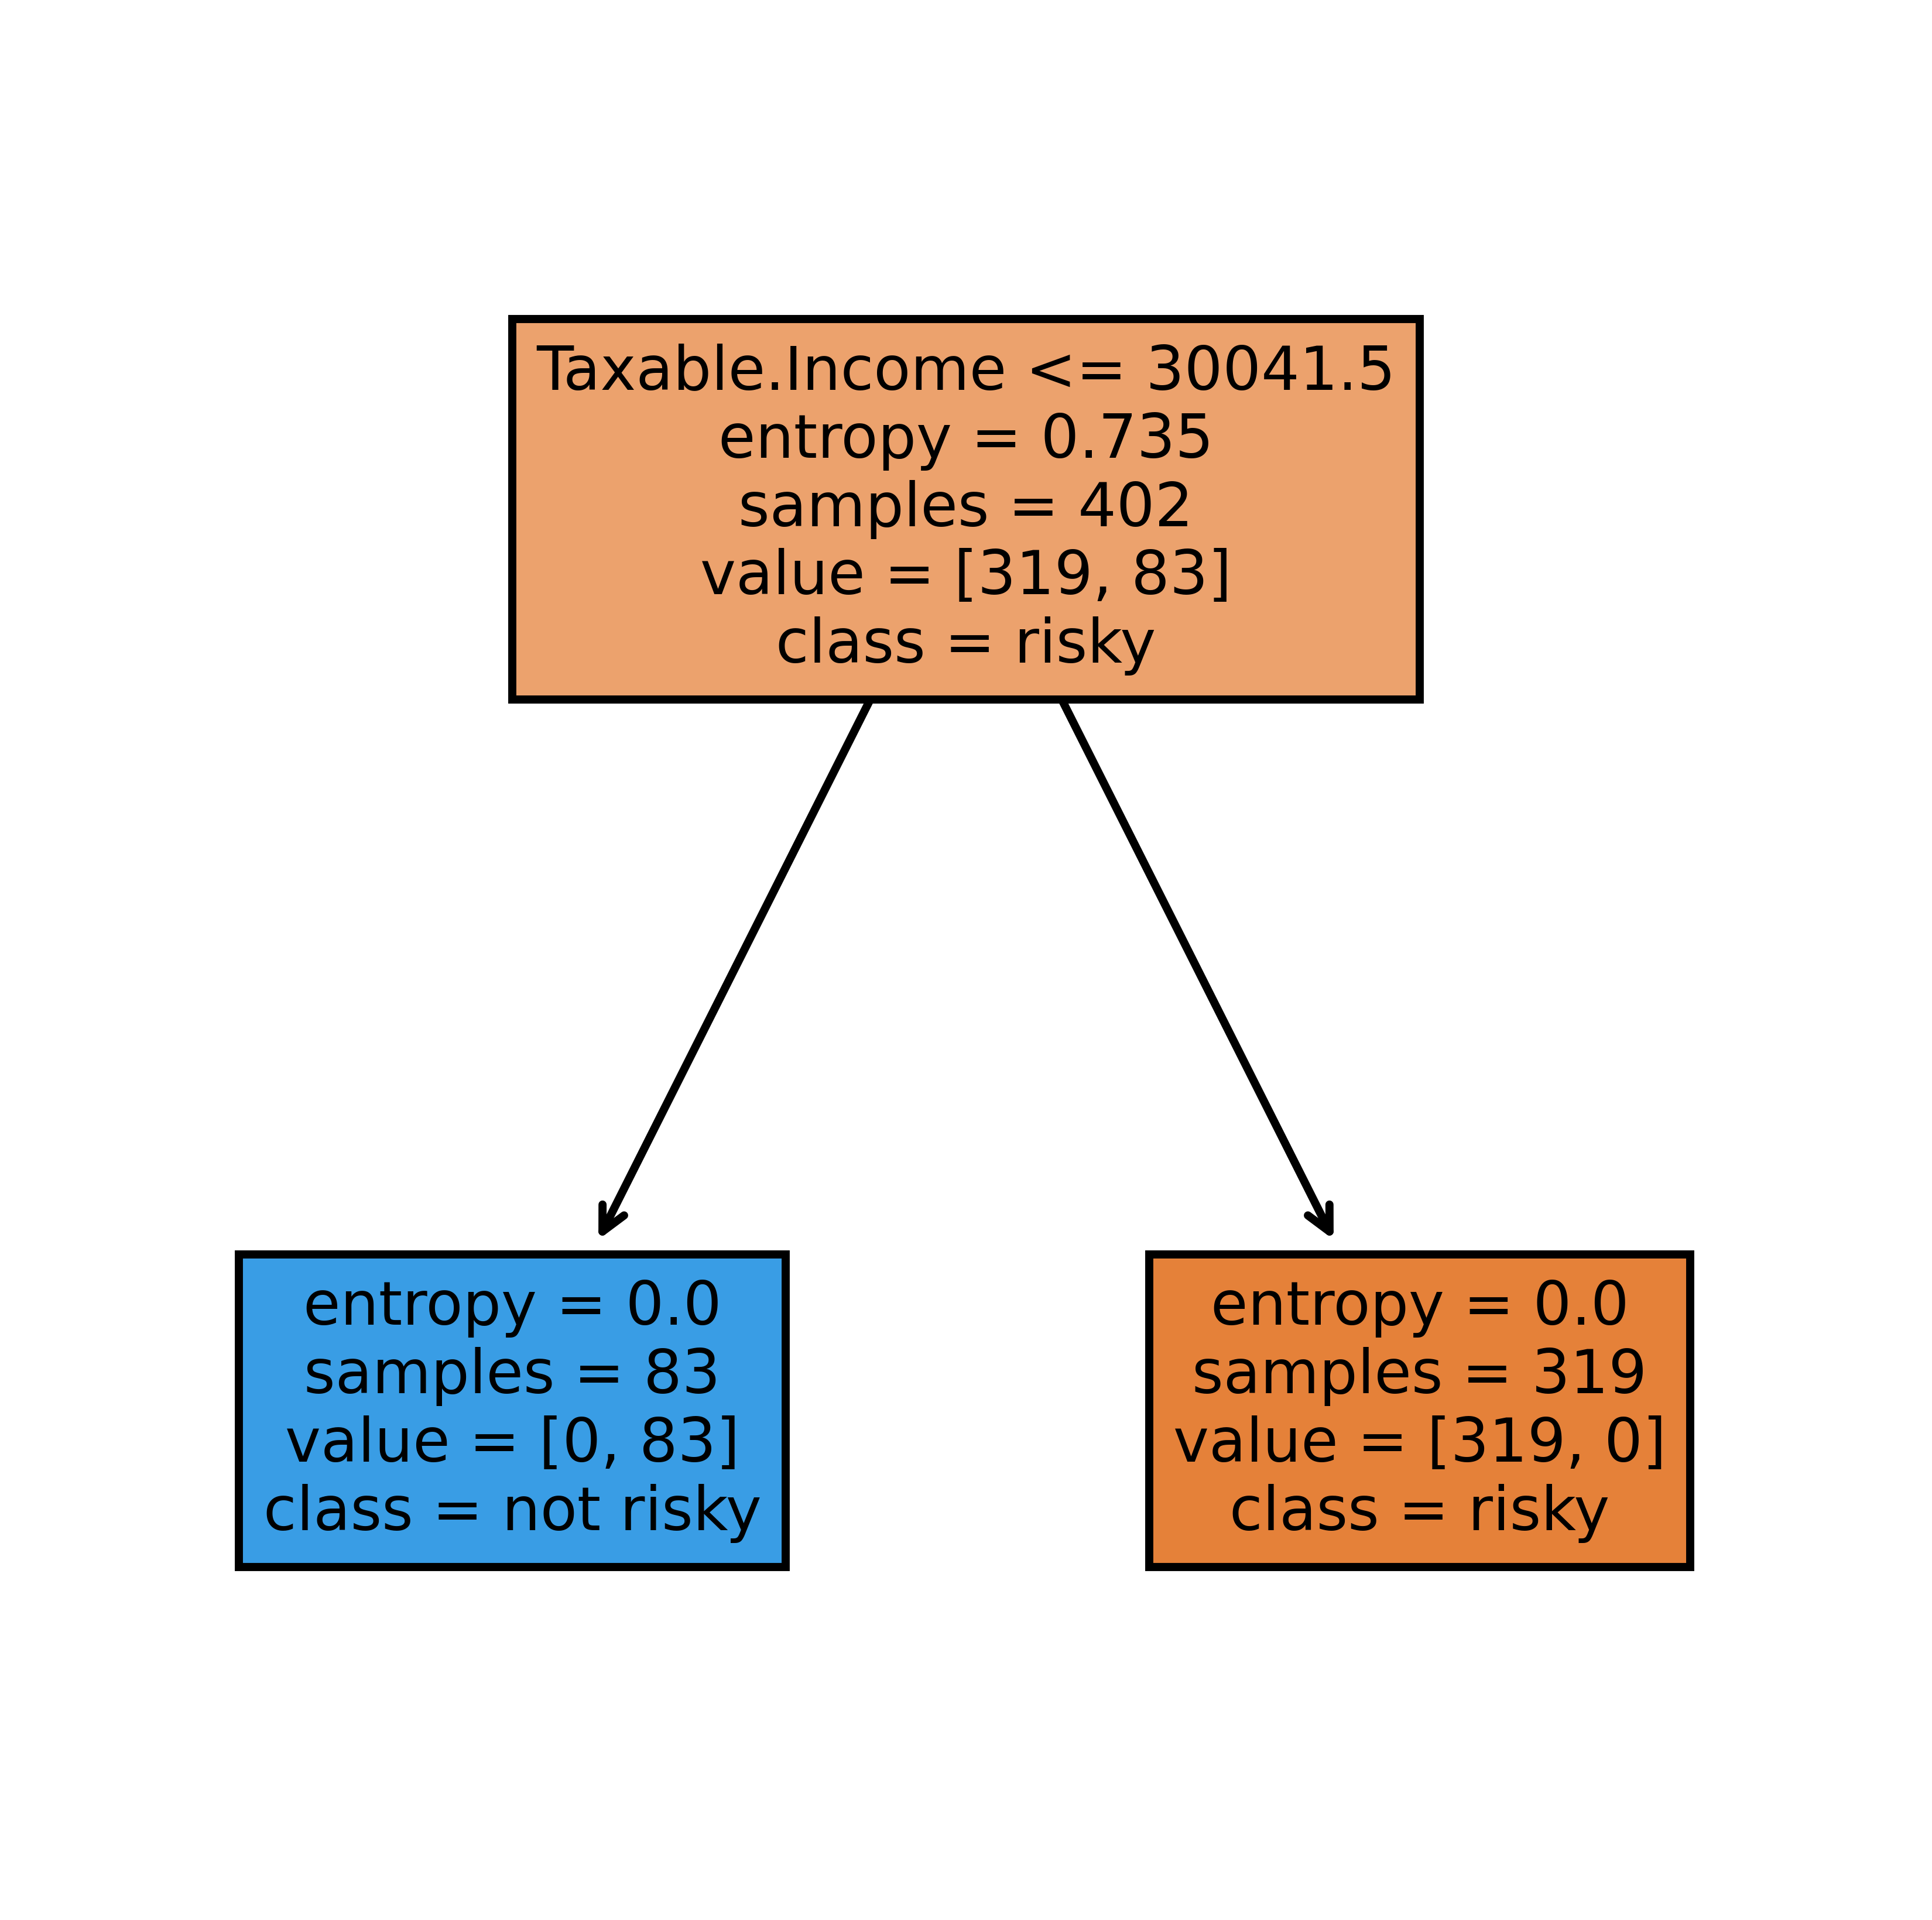

In [45]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky', 'not risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(second_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [46]:
accuracy_score(pred_second,y_test)

1.0

# inference
An accuracy score of 1.0 implies that all the predicted labels perfectly matched the true labels in the test set. This suggests that the model made no errors in its predictions and accurately classified all instances.

However, as with any perfect accuracy score, it is important to validate the model and investigate further to ensure the accuracy is indeed accurate and not a result of any underlying issues such as data leakage, overfitting, or a mistake in the evaluation process. It is recommended to thoroughly evaluate the model and consider additional metrics and analysis to confirm its performance.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_second)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        41

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



# inference
Precision: For both class 0 and class 1, the precision is 1.00, indicating that all instances predicted as class 0 and class 1 were actually in those respective classes. A precision of 1.00 implies no false positives.

Recall: For both class 0 and class 1, the recall is 1.00, suggesting that all instances belonging to class 0 and class 1 were correctly identified. A recall of 1.00 implies no false negatives.

F1-score: The F1-score for both class 0 and class 1 is 1.00, representing the harmonic mean of precision and recall for each class. A perfect F1-score indicates an accurate balance between precision and recall.

Support: For class 0, there are 157 instances, and for class 1, there are 41 instances.

Accuracy: The overall accuracy is 1.00, indicating that all instances in the test set were correctly predicted.

Macro average: The macro average precision, recall, and F1-score are all 1.00, suggesting an excellent average performance across all classes.

Weighted average: The weighted average precision, recall, and F1-score are all 1.00, indicating the average performance weighted by the support for each class.

In summary, the classification report indicates perfect performance for both classes, with precision, recall, F1-score, and accuracy all equal to 1.00. This suggests that the model made no errors in its predictions and achieved 100% accuracy. However, it is still important to validate the model and ensure that the perfect accuracy is not due to any underlying issues such as data leakage or overfitting.

In [48]:
print(confusion_matrix(y_test,pred_second))

[[157   0]
 [  0  41]]


# inference
Analyzing the confusion matrix :

Class 0: There are 157 instances correctly classified as class 0 (true negatives), indicating accurate predictions. There are no instances incorrectly classified as class 1 (false positives) for this class.

Class 1: There are 41 instances correctly classified as class 1 (true positives), suggesting accurate identification. There are no instances incorrectly classified as class 0 (false negatives) for this class.

The confusion matrix shows a perfect classification performance, with no misclassifications for either class. All instances in class 0 and class 1 were correctly predicted.

This confirms the perfect accuracy score of 1.0, as mentioned in the previous classification report. However, it is important to thoroughly validate the model and consider additional analysis to ensure that the perfect performance is not a result of any underlying issues such as data leakage, overfitting, or a mistake in the evaluation process.

# Both "gini" & "entropy" Criteria gives maximum accuracy